In [1]:
!gcloud config set project etsy-bigquery-adhoc-prod


If you have a compatible Python interpreter installed, you can use it by setting
the CLOUDSDK_PYTHON environment variable to point to it.

Updated property [core/project].


In [2]:
%load_ext google.cloud.bigquery

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pandas as pd
import numpy as np

In [8]:
%%bigquery df
select 
    `key` as query_str,
    queryLevelMetrics_bin as query_bin,
    queryTaxoDemandFeatures_purchaseTopTaxonomyPaths,
from `etsy-ml-systems-prod.feature_bank_v2.query_feature_bank_2023-10-25`
where queryTaxoDemandFeatures_purchaseTopTaxonomyPaths is not null
and array_length(queryTaxoDemandFeatures_purchaseTopTaxonomyPaths.list) > 0
and queryTaxoDemandFeatures_purchaseTopTaxonomyPaths.list[0].element != ""

Downloading: 100%|██████████████| 5537174/5537174 [00:07<00:00, 711242.37rows/s]


In [9]:
df.head()

,query_str,query_bin,queryTaxoDemandFeatures_purchaseTopTaxonomyPaths
0,custom wooden spoon,top.1,"{'list': [{'element': 'home_and_living'}, {'el..."
1,postal truck tray,head,{'list': [{'element': 'electronics_and_accesso...
2,ipswich town,top.1,"{'list': [{'element': 'art_and_collectibles'},..."
3,jordan 1 low travi scott,top.1,{'list': [{'element': 'shoes'}]}
4,jordan 1 slipper,top.1,{'list': [{'element': 'shoes'}]}


In [10]:
df["n_top_paths"] = df.queryTaxoDemandFeatures_purchaseTopTaxonomyPaths.apply(lambda x: len(x["list"]))
n_top_max = df.n_top_paths.max()

In [13]:
n_top_max

15

In [11]:
bins = list(range(1, n_top_max + 1))
hist_values = df.n_top_paths.value_counts()[bins]

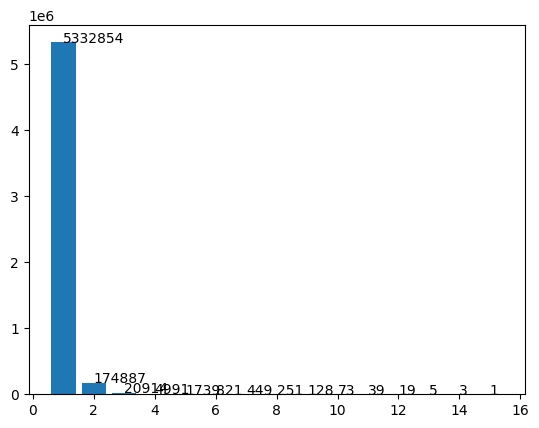

In [12]:
# bins = [1, 2, 3, 4, 5, 6, 10, 20, 50, 100]
# bin_labels = ["2", "3", "4", "5", "6-10", "10-20", "20-50", "50-100"]

bin_labels = [str(x) for x in bins]

percentage = ["{0:.0%}".format(x) for x in np.round(hist_values / df.shape[0], 5)]

ax = plt.bar(x=bins, height=hist_values.values)
for x, y, p in zip(bins, hist_values.values, hist_values.values):
    plt.text(x, y, p)

plt.show()

In [16]:
%%bigquery df
select 
    `key` as query_str,
    queryLevelMetrics_bin as query_bin,
    queryTaxoDemandFeatures_purchaseLevel2TaxonomyPaths,
from `etsy-ml-systems-prod.feature_bank_v2.query_feature_bank_2023-10-25`
where queryTaxoDemandFeatures_purchaseLevel2TaxonomyPaths is not null
and array_length(queryTaxoDemandFeatures_purchaseLevel2TaxonomyPaths.list) > 0
and queryTaxoDemandFeatures_purchaseLevel2TaxonomyPaths.list[0].element != ""

Downloading: 100%|██████████████| 5458073/5458073 [00:07<00:00, 717738.47rows/s]


In [17]:
df.head()

,query_str,query_bin,queryTaxoDemandFeatures_purchaseLevel2TaxonomyPaths
0,jewelry for sewer,None,{'list': [{'element': 'home_and_living.home_de...
1,jewelry graduation dish,torso,{'list': [{'element': 'jewelry.jewelry_storage...
2,jewelry gift box,top.01,{'list': [{'element': 'jewelry.jewelry_storage...
3,mirror label,head,{'list': [{'element': 'paper_and_party_supplie...
4,jewelry gift box for woman,None,{'list': [{'element': 'jewelry.jewelry_storage...


In [18]:
df["n_level2_paths"] = df.queryTaxoDemandFeatures_purchaseLevel2TaxonomyPaths.apply(lambda x: len(x["list"]))
n_level2_max = df.n_level2_paths.max()

In [19]:
n_level2_max

50

In [20]:
df[df.n_level2_paths >= 40].shape

(15, 4)

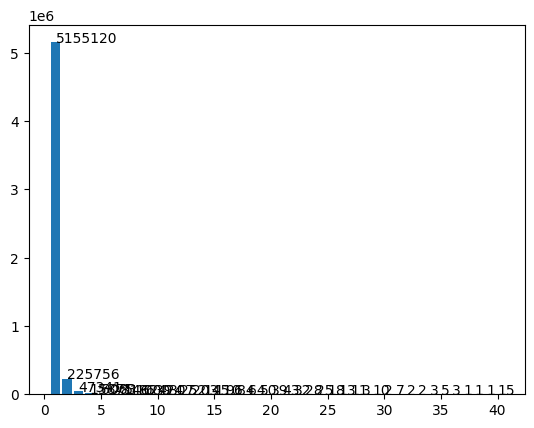

In [22]:
bins = list(range(1, 40))
hist_values = df.n_level2_paths.value_counts()[bins]
bins.append(40)
hist_values = list(hist_values.values)
hist_values.append(15)

ax = plt.bar(x=bins, height=hist_values)
for x, y, p in zip(bins, hist_values, hist_values):
    plt.text(x, y, p)

plt.show()

In [4]:
%%bigquery df
select query, array_length(taxonomy) as num_taxo
from `etsy-sr-etl-prod.yzhang.query_bert_taxo_2023_10_28`

Downloading: 100%|██████████████| 1112977/1112977 [00:03<00:00, 342137.71rows/s]


In [5]:
df.head()

,query,num_taxo
0,oberteile damen,1367
1,fireplace mantel surround fire mantle,868
2,mask skull costume halloween papercraft,77
3,my grandkids have my heart,144
4,echo dot 5,1077


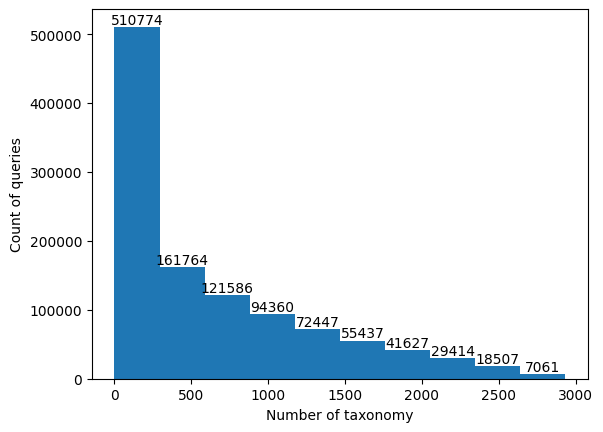

In [8]:
counts, edges, bars = plt.hist(df.num_taxo)
plt.bar_label(bars)
plt.xlabel("Number of taxonomy")
plt.ylabel("Count of queries")
plt.show()

In [9]:
df.num_taxo.max()

2933